# ğŸšš **Entregables**

**No olvide duplicar esta notebook para poder editar: File->Save a copy in Drive**

En este laboratorio, no es necesario redactar un informe en un documento separado. Por favor, complete todas las actividades requeridas dentro de esta notebook de Google Colab. Recuerde que una notebook le permite ingresar elementos de texto de manera similar a un procesador de documentos. Una vez finalizadas las actividades propuestas, deberÃ¡ entregar lo siguiente en la plataforma:

1. Un archivo PDF generado en Google Colab desde el menÃº "Archivo" -> "Imprimir".

2. El enlace pÃºblico de Google Colab. Para ello, vaya al botÃ³n de compartir y cambie la configuraciÃ³n de comparticiÃ³n a "Cualquier persona con el enlace".

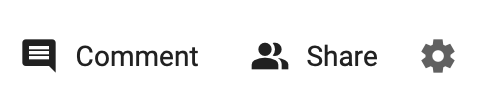

# **LABORATORIO DE REGRESIÃ“N: PREDICCIÃ“N DEL NÃšMERO DE USUARIOS ACTIVOS EN UNA PLATAFORMA**

En este laboratorio queremos predecir el nÃºmero de usuarios activos en una plataforma en lÃ­nea segÃºn la hora del dÃ­a a partir de una serie de mediciones que disponemos en una base de datos. Para esto usaremos mÃ©todos de regresiÃ³n.

# **VisualizaciÃ³n del Dataset**

Importamos las bibliotecas necesarias: pandas para cargar el archivo CSV en un DataFrame de pandas y matplotlib.pyplot para trazar el grÃ¡fico.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Cargamos los datos del archivo CSV en un DataFrame de pandas usando la funciÃ³n pd.read_csv(). El archivo CSV debe tener dos columnas llamadas "hour" y "users" para que el cÃ³digo funcione correctamente. El archivo CSV se carga en un DataFrame llamado df

In [ ]:
# Cargar los datos del archivo CSV en un DataFrame de pandas

url = 'https://raw.githubusercontent.com/mtgca/datasets_public/main/active_users_data.csv'
df = pd.read_csv(url)

#df = pd.read_csv('data.csv')


Usamos la funciÃ³n plt.scatter() para crear el grÃ¡fico de dispersiÃ³n. Le pasamos la columna "hour" como eje x y la columna "users" como eje y. El resultado es un grÃ¡fico de puntos en el que cada punto representa una combinaciÃ³n de valores de hora y usuarios. Usamos las funciones plt.xlabel() y plt.ylabel() para establecer etiquetas en los ejes x e y del grÃ¡fico, respectivamente. Finalmente, usamos la funciÃ³n plt.show() para mostrar el grÃ¡fico en la pantalla.

In [ ]:
# Crea un scatter plot de "users" vs "hour"
plt.scatter(df['hour'], df['users'], color='b', alpha=0.4, label='Data')

# Etiqueta los ejes
plt.xlabel('Hour of the day')
plt.ylabel('# Active Users')

# Muestra el plot
plt.show()

# **Modelo de regresiÃ³n lineal**

En este apartado implementaremos regresiÃ³n lineal sin regularizaciÃ³n. Dado que el dataset muestra una relaciÃ³n no lineal (ver visualizaciÃ³n arriba), es necesario utilizar regresiÃ³n polinÃ³mica.

Primero, se importan las bibliotecas necesarias, que incluyen:

* PolynomialFeatures: una funciÃ³n para generar caracterÃ­sticas polinÃ³micas para
un conjunto de datos.
* StandardScaler: una funciÃ³n para escalar los datos a un rango comÃºn.
* LinearRegression: una funciÃ³n para ajustar un modelo lineal a los datos.
* Pipeline: una funciÃ³n para concatenar varias transformaciones en un estimador.
mean_squared_error: una funciÃ³n para calcular el error cuadrÃ¡tico medio.
* r2_score: una funciÃ³n para calcular el coeficiente de determinaciÃ³n R^2.
* train_test_split: una funciÃ³n para dividir los datos en conjuntos de entrenamiento y prueba.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np # matlab de python


A continuaciÃ³n, se define una funciÃ³n llamada calculate_regression_metrics que toma un modelo, un conjunto de datos x y una variable objetivo ytrue, y devuelve la raÃ­z cuadrada del error cuadrÃ¡tico medio (RMSE) y el coeficiente de determinaciÃ³n R^2. Esta funciÃ³n se utilizarÃ¡ mÃ¡s adelante para calcular las mÃ©tricas de error para el conjunto de entrenamiento y prueba.

In [ ]:
# funciÃ³n auxiliar para calcular el RMSE y R2 de un modelo de regresiÃ³n
def calculate_regression_metrics(model, x, ytrue):
    ypred = model.predict(x)
    rmse = np.sqrt(mean_squared_error(ytrue, ypred))
    r2 = r2_score(ytrue, ypred)
    return rmse, r2

Luego, los datos se dividen en conjuntos de entrenamiento y prueba utilizando la funciÃ³n train_test_split.

In [ ]:
# divisiÃ³n aleatoria de datos en conjunto de entrenamiento y conjunto de text
split_seed = 11  # para reproducibilidad
train_frac = 0.8 #80 % para train, 20% para test (random)
train_df, test_df = train_test_split(df, train_size=train_frac, random_state=split_seed)
print(train_df.head())

A continuaciÃ³n, se ajusta un modelo de regresiÃ³n polinÃ³mica de grado N (ver variable degree) al conjunto de entrenamiento utilizando la funciÃ³n Pipeline.



In [ ]:
# Ajustar en el conjunto de entrenamiento
degree = 17
model = Pipeline([ #REPRESENTAR
                    ('poly', PolynomialFeatures(degree)), #1era etapa
                    ('scal', StandardScaler()), #2do paso zscore
                    ('reg', LinearRegression()) #3er paso, reg. lin normal
                ])
model.fit(train_df[['hour']], train_df['users'])

Luego, se utilizan la funciÃ³n calculate_regression_metrics y los conjuntos de entrenamiento y prueba para calcular el RMSE y el R^2 para el modelo ajustado en ambos conjuntos.

In [ ]:
# Calcular error  MSE y R2 en el conjunto de entrenamiento
rmse_train, r2_train = calculate_regression_metrics(model, train_df[['hour']], train_df['users'])
print("RMSE train: ", rmse_train, "R-squared train:", r2_train)

# Calcular error  MSE y R2 en el conjunto de test
rmse_test, r2_test = calculate_regression_metrics(model, test_df[['hour']], test_df['users'])
print("RMSE test: ", rmse_test, "R-squared test:", r2_test)

DespuÃ©s, se utiliza el modelo ajustado para predecir los valores de la variable objetivo en el conjunto de prueba.

In [ ]:
# Predecir en el conjunto de test
pred_test = model.predict(test_df[['hour']])
print(pred_test)

Finalmente, graficamos el conjunto de entrenamiento y en rojo el modelo entrenado

In [ ]:

# Generar una secuencia de valores para hour entre 0 y 24 horas
hour_seq = np.linspace(train_df['hour'].min(), train_df['hour'].max(), num=100).reshape(-1, 1)

# Predecir los valores de users para la secuencia de valores de hour
users_pred = model.predict(hour_seq)

# Graficar los valores de hour en el eje x y los valores predichos de users en el eje y
plt.scatter(train_df['hour'], train_df['users'], color='b', alpha=0.4, label='Data')
plt.plot(hour_seq, users_pred, color='red', label='Model')
plt.xlabel('hour')
plt.ylabel('users')
plt.title("Linear Regression with polynimal order = "+str(degree))
plt.legend()
plt.show()

## **SelecciÃ³n del mejor modelo: Optimizando el hiperparÃ¡metro "grado del polinomio"**


Este cÃ³digo utiliza varias bibliotecas de Python, principalmente de Scikit-learn y Matplotlib, para ajustar un modelo de regresiÃ³n lineal con caracterÃ­sticas polinomiales a un conjunto de datos.

1. **Importaciones**:
   - `GridSearchCV` de `sklearn.model_selection`: Utilizado para realizar una bÃºsqueda exhaustiva sobre un rango especificado de hiperparÃ¡metros de un modelo.
   - `matplotlib.pyplot` como `plt` y `numpy` como `np`: Bibliotecas para manejar grÃ¡ficos y operaciones numÃ©ricas, respectivamente. Aunque se importan, no se utilizan directamente en el fragmento de cÃ³digo proporcionado.

2. **CreaciÃ³n del Diccionario de ParÃ¡metros (`param_grid`)**:
   - Se define un diccionario con los hiperparÃ¡metros que se quieren ajustar. AquÃ­, se estÃ¡ ajustando el grado del polinomio (`poly__degree`) que varÃ­a desde 1 hasta 100.

3. **DefiniciÃ³n de la Pipeline (`model`)**:
   - Se utiliza una `Pipeline` para encadenar varios pasos de procesamiento y modelado:
     - `PolynomialFeatures()` para generar caracterÃ­sticas polinomiales a partir de los datos de entrada.
     - `StandardScaler()` para estandarizar las caracterÃ­sticas generadas, es decir, ajustarlas para que tengan media 0 y varianza 1.
     - `LinearRegression()` para aplicar un modelo de regresiÃ³n lineal.

4. **InicializaciÃ³n de `GridSearchCV`**:
   - Se crea una instancia de `GridSearchCV`, especificando el modelo (pipeline), el diccionario de parÃ¡metros, y varias opciones adicionales:
     - `cv=5` indica que se debe usar una validaciÃ³n cruzada de 5-folds.
     - `scoring='neg_mean_squared_error'` establece el error cuadrÃ¡tico medio negativo como la mÃ©trica para evaluar el modelo. El signo negativo se usa porque GridSearchCV busca maximizar un score, mientras que queremos minimizar el error.
     - `return_train_score=True` indica que los scores de entrenamiento tambiÃ©n deben ser incluidos en los resultados.
     - `verbose=1` activa mensajes de progreso (cuanto mÃ¡s alto es el nÃºmero, mÃ¡s mensajes se muestran).

5. **Ajuste de `GridSearchCV` al Conjunto de Entrenamiento**:
   - `grid_search.fit(train_df[['hour']], train_df['users'])`: AquÃ­ se ajusta el `GridSearchCV` a los datos de entrenamiento. Se supone que `train_df` es un DataFrame que contiene al menos dos columnas: `hour` y `users`. `hour` se utiliza como caracterÃ­stica y `users` como la variable objetivo (por ejemplo, nÃºmero de usuarios activos en un sitio web durante ciertas horas).

Este script es especialmente Ãºtil para modelar relaciones no lineales entre las caracterÃ­sticas y la variable de respuesta, optimizando simultÃ¡neamente los hiperparÃ¡metros del modelo. Una vez completado el ajuste, el modelo con el mejor rendimiento (menor error cuadrÃ¡tico medio) se puede seleccionar e inspeccionar utilizando los mÃ©todos y atributos de `grid_search`.

In [ ]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Crear un diccionario de parÃ¡metros a probar
param_grid = {'poly__degree': np.arange(1, 101)}

# Definir la pipeline
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scal', StandardScaler()),
    ('reg', LinearRegression())
])

# Inicializar GridSearchCV
grid_search = GridSearchCV(model, param_grid,
                           cv=5,# kfold cross val
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           verbose=4)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(train_df[['hour']], train_df['users'])




A continuaciÃ³n, este fragmento de cÃ³digo proporciona una visualizaciÃ³n detallada de los resultados obtenidos de una bÃºsqueda de hiperparÃ¡metros utilizando `GridSearchCV` para un modelo de regresiÃ³n con caracterÃ­sticas polinomiales.

1. **Obtener los Resultados de la BÃºsqueda de ParÃ¡metros**:
   - `results = grid_search.cv_results_` guarda en `results` todos los resultados de la validaciÃ³n cruzada para cada combinaciÃ³n de parÃ¡metros probados durante la bÃºsqueda de `GridSearchCV`. Esta informaciÃ³n incluye, entre otras cosas, el score medio de entrenamiento y validaciÃ³n para cada configuraciÃ³n de parÃ¡metros.

2. **Obtener el Mejor Modelo Encontrado por GridSearchCV**:
   - `best_model = grid_search.best_estimator_` recupera el mejor modelo encontrado por `GridSearchCV` basado en la mÃ©trica de evaluaciÃ³n especificada (en este caso, el error cuadrÃ¡tico medio negativo).

3. **Extraer los Errores de Entrenamiento y ValidaciÃ³n Cruzada**:
   - `train_errors = np.sqrt(-results['mean_train_score'])` y `val_errors = np.sqrt(-results['mean_test_score'])` calculan la raÃ­z del error cuadrÃ¡tico medio (RMSE) para los scores de entrenamiento y validaciÃ³n, respectivamente. Los valores estÃ¡n negativos en `results` porque el `scoring` especificado fue `neg_mean_squared_error`, por lo que se necesita convertirlos a positivo y luego tomar la raÃ­z cuadrada para obtener el RMSE.

4. **Obtener los Grados del Polinomio Probados**:
   - `degrees = param_grid['poly__degree']` extrae los grados del polinomio que fueron probados en la bÃºsqueda de parÃ¡metros.

5. **Graficar los Errores de Entrenamiento y ValidaciÃ³n Cruzada**:
   - AquÃ­ se crea un grÃ¡fico que compara el RMSE de entrenamiento y validaciÃ³n en funciÃ³n del grado polinomial:
     - Se utiliza un grÃ¡fico de escala logarÃ­tmica tanto para el eje x (grados del polinomio) como para el eje y (RMSE) para manejar mejor el amplio rango de valores y visualizar las tendencias mÃ¡s claramente.
     - Se aÃ±aden etiquetas, tÃ­tulo, una leyenda, y se habilita la cuadrÃ­cula para mejorar la legibilidad del grÃ¡fico.

6. **Destacar el Mejor Modelo**:
   - `best_degree = best_model.named_steps['poly'].degree` recupera el grado del polinomio del mejor modelo encontrado.
   - `plt.axvline(x=best_degree, color='r', linestyle='--', label=f'Best model at Polynomial Degree: {best_degree}')` aÃ±ade una lÃ­nea vertical en el grÃ¡fico para destacar el grado polinomial del mejor modelo.

El uso de este cÃ³digo es ideal para visualizar cÃ³mo el grado del polinomio afecta el rendimiento del modelo y para identificar un equilibrio adecuado entre el ajuste a los datos de entrenamiento y la generalizaciÃ³n a nuevos datos, indicado por los errores de validaciÃ³n.

In [ ]:
# Obtener los resultados de la bÃºsqueda de parÃ¡metros
results = grid_search.cv_results_

# Obtener el mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_

# Extraer los errores de entrenamiento y validaciÃ³n cruzada
train_errors = np.sqrt(-results['mean_train_score'])
val_errors = np.sqrt(-results['mean_test_score'])

# Obtener los grados del polinomio probados
degrees = param_grid['poly__degree']

# Graficar los errores de entrenamiento y validaciÃ³n cruzada
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, val_errors, label='Validation Error', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Polynomial Degree')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Validation Error vs Polynomial Degree')

plt.grid(True)

# Obtener el grado del polinomio seleccionado por el mejor modelo
best_degree = best_model.named_steps['poly'].degree
# Dibujar una lÃ­nea vertical en el grado del polinomio seleccionado
plt.axvline(x=best_degree, color='r', linestyle='--', label=f'Best model at Polynomial Degree: {best_degree}')
plt.legend()
plt.show()

Finalmente, en la siguiente celda de cÃ³digo evaluamos el modelo en el conjunto de test:

1. **Obtener el Mejor Modelo**:
   - `best_model = grid_search.best_estimator_` recupera el mejor modelo del objeto `GridSearchCV`. Este modelo es el que tuvo el mejor desempeÃ±o en la validaciÃ³n cruzada segÃºn la mÃ©trica especificada.

2. **Ajustar el Mejor Modelo al Conjunto de Entrenamiento**:
   - `best_model.fit(train_df[['hour']], train_df['users'])` ajusta el mejor modelo a los datos de entrenamiento. AquÃ­, se asume que `train_df` es un DataFrame que contiene al menos dos columnas: `hour` y `users`. La columna `hour` se utiliza como caracterÃ­stica y `users` como la variable objetivo.  En un escenario prÃ¡ctico, este paso serÃ­a redundante porque 'GridSearchCV' ya ajusta el mejor modelo.Sin embargo, se incluye aquÃ­ con fines didÃ¡cticos para demostrar cÃ³mo se realiza el ajuste de un modelo.


3. **Hacer Predicciones con el Mejor Modelo**:
   - `predictions = best_model.predict(test_df[['hour']])` utiliza el modelo ya ajustado para hacer predicciones sobre un conjunto de prueba separado, `test_df`.

4. **Evaluar el Rendimiento del Modelo en el Conjunto de Prueba**:
   - `rmse_test, r2_test = calculate_regression_metrics(best_model, test_df[['hour']], test_df['users'])` calcula las mÃ©tricas de rendimiento del modelo en el conjunto de prueba.



In [ ]:
# Obtener el mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_

# Ajustar el mejor modelo al conjunto de entrenamiento
# En un escenario prÃ¡ctico, este paso serÃ­a redundante porque 'GridSearchCV' ya ajusta el mejor modelo.
# Sin embargo, se incluye aquÃ­ con fines didÃ¡cticos para demostrar cÃ³mo se realiza el ajuste de un modelo.
best_model.fit(train_df[['hour']], train_df['users'])

# Hacer predicciones con el mejor modelo
predictions = best_model.predict(test_df[['hour']])

# Evaluar el rendimiento del modelo en el conjunto de prueba
rmse_test, r2_test = calculate_regression_metrics(best_model, test_df[['hour']], test_df['users'])
print("RMSE test (best model): ", rmse_test,  'active users')
print("R-squared test (best model):", r2_test)


## âœ… **Actividad RegresiÃ³n Lineal**

Discuta brevemente sobre la figura "grado del polinomio" vs RMSE arriba graficada para la regresiÃ³n lineal.




> ğŸ–Š `Desarrollar aquÃ­ su actividad`





# **Modelo de RegresiÃ³n de Ridge**




Ahora, vamos a abordar el problema usando RegresiÃ³n lineal de Ridge. Recuerde que la regresiÃ³n de Ridge incluye un hiperparÃ¡metro llamado hiperparÃ¡metro de regularizaciÃ³n que controla el overfitting. El hiperparÃ¡metro de regularizaciÃ³n varÃ­a entre 0 e infinito. Normalmente, lambda tiene valores pequeÃ±os como veremos en este laboratorio. Valores grande de lambda pueden causar "underfitting" mientras que valores cercanos a cero pueden causar overfitting.

Primero se importa el modelo de regresiÃ³n Ridge desde sklearn.linear_model.


In [ ]:

from sklearn.linear_model import Ridge # L2 norm regularizer

Luego, se establece el valor de regularizaciÃ³n lambda_value en 1
Se crea ademÃ¡s un modelo de regresiÃ³n Ridge utilizando un Pipeline de tres pasos:
1. PolynomialFeatures(degree=75) crea caracterÃ­sticas polinÃ³micas de grado 75 a partir de los datos de entrada.
2. StandardScaler() estandariza los datos para que tengan media cero y varianza unitaria.
3. Ridge(alpha=lambda_value) ajusta el modelo de regresiÃ³n Ridge utilizando el valor de regularizaciÃ³n lambda_value. Aunque en clase este hiperparÃ¡metro lo definimos con la letra griega lambda, es importante mencionar que en la librerÃ­a sklearn, este hiperparÃ¡metro lo definen con la letra griega alfa.

In [ ]:
lambda_value = 0#1e-18
# Ajustar en el conjunto de entrenamiento
model_ridge = Pipeline([
                        ('poly', PolynomialFeatures(degree=75)), #NO MODIFICAR
                        ('scal', StandardScaler()),
                        ('reg', Ridge(alpha=lambda_value))
                        ])


Finalmente, el siguiente cÃ³digo ajusta el modelo de Ridge, calcula las mÃ©tricas correspondientes y presenta el modelo en un grÃ¡fico. Note que este cÃ³digo es similar al anteriormente usado por lo que no entraremos en detalle en su funcionamiento. Consulte en la secciÃ³n anterior para mÃ¡s detalles.

In [ ]:

model_ridge.fit(train_df[['hour']], train_df['users'])

# Calcular error  MSE y R2 en el conjunto de entrenamiento
rmse_train, r2_train = calculate_regression_metrics(model_ridge, train_df[['hour']], train_df['users'])
print("MSE train: ", rmse_train, "R-squared train:", r2_train)

# Calcular error  MSE y R2 en el conjunto de test
rmse_test, r2_test = calculate_regression_metrics(model_ridge, test_df[['hour']], test_df['users'])
print("MSE test: ", rmse_test, "R-squared test:", r2_test)

# Predecir en el conjunto de test
pred_test = model_ridge.predict(test_df[['hour']])

# Generar una secuencia de valores para hour entre 0 y 24 horas
hour_seq = np.linspace(train_df['hour'].min(), train_df['hour'].max(), num=100).reshape(-1, 1)

# Predecir los valores de users para la secuencia de valores de hour
users_pred = model_ridge.predict(hour_seq)

# Graficar los valores de hour en el eje x y los valores predichos de users en el eje y
plt.scatter(train_df['hour'], train_df['users'], color='b', alpha=0.4, label='Data')
plt.plot(hour_seq, users_pred, color='red', label='Model')
plt.xlabel('hour')
plt.ylabel('users')
plt.title("Ridge Regression with lambda = "+str(lambda_value))
plt.legend()
plt.show()

## **SelecciÃ³n del mejor modelo de Ridge: Optimizando el hiperparÃ¡metro $\lambda$**



El cÃ³digo a continuaciÃ³n realiza un proceso de ajuste y evaluaciÃ³n de un modelo de regresiÃ³n Ridge, similar al ejercicio previo con regresiÃ³n lineal, pero incorporando regularizaciÃ³n L2 a travÃ©s del hiperparÃ¡metro lambda ($\lambda$). AquÃ­, se establece un grado polinomial alto (55) para las caracterÃ­sticas de entrada, con el propÃ³sito de observar el efecto de la regularizaciÃ³n Ridge en un escenario donde es probable que se produzca sobreajuste debido a la complejidad del modelo.

El cÃ³digo sigue estos pasos clave:

1. **ConfiguraciÃ³n de la BÃºsqueda de HiperparÃ¡metros**: Se define un rango para el hiperparÃ¡metro de regularizaciÃ³n ($\lambda$), `alpha` en Scikit-learn) que se quiere optimizar, utilizando valores desde $10^{-10}$ hasta $10^{3}$.

2. **DefiniciÃ³n del Modelo**: Se crea una `Pipeline` que incluye transformaciones polinÃ³micas de grado 55 y estandarizaciÃ³n de las caracterÃ­sticas, seguido por el modelo Ridge, que utiliza regularizaciÃ³n L2.

3. **BÃºsqueda con GridSearchCV**: Se utiliza `GridSearchCV` para encontrar el valor Ã³ptimo de $\lambda$ mediante validaciÃ³n cruzada con 2 folds, evaluando los modelos con el error cuadrÃ¡tico medio negativo.

4. **Entrenamiento y ValidaciÃ³n**: El mejor modelo obtenido de `GridSearchCV` es entrenado y validado, extrayendo los errores de entrenamiento y validaciÃ³n para su anÃ¡lisis.

5. **VisualizaciÃ³n**: Se grafican los errores de entrenamiento y validaciÃ³n en funciÃ³n del hiperparÃ¡metro $\lambda$, con escalas logarÃ­tmicas en ambos ejes, para mostrar cÃ³mo varÃ­a el rendimiento con diferentes niveles de regularizaciÃ³n.

6. **SelecciÃ³n y EvaluaciÃ³n del Mejor Modelo**: Se destaca el mejor valor de $\lambda$ encontrado y se evalÃºa el rendimiento del modelo seleccionado en un conjunto de prueba, mostrando el RMSE y el coeficiente de determinaciÃ³n  $R^2$.

El propÃ³sito educativo del cÃ³digo es demostrar el impacto de la regularizaciÃ³n en un modelo propenso al sobreajuste y cÃ³mo la optimizaciÃ³n de $\lambda$ puede mejorar la capacidad de generalizaciÃ³n del modelo. La regularizaciÃ³n L2 pretende penalizar los coeficientes mÃ¡s grandes, forzando al modelo a mantenerlos pequeÃ±os, lo que suele resultar en una mejor generalizaciÃ³n y en la prevenciÃ³n del sobreajuste en modelos altamente complejos.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Crear un diccionario de parÃ¡metros a probar
param_grid = {'reg__alpha': np.logspace(-10, 3, 100)} # Rango de valores para alpha (parÃ¡metro de regularizaciÃ³n)

# Definir la pipeline
model = Pipeline([
    ('poly', PolynomialFeatures(degree=55)), # Se fija el grado del polinomio en 75
    ('scal', StandardScaler()),
    ('reg', Ridge()) # Se cambia a Ridge
])

# Inicializar GridSearchCV
grid_search = GridSearchCV(model, param_grid,
                           cv=2, # kfold cross validation
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           verbose=4)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(train_df[['hour']], train_df['users'])

# Obtener los resultados de la bÃºsqueda de parÃ¡metros
results = grid_search.cv_results_

# Obtener el mejor modelo encontrado por GridSearchCV
# En un escenario prÃ¡ctico, este paso serÃ­a redundante porque 'GridSearchCV' ya ajusta el mejor modelo.
# Sin embargo, se incluye aquÃ­ con fines didÃ¡cticos para demostrar cÃ³mo se realiza el ajuste de un modelo.
best_model = grid_search.best_estimator_

# Extraer los errores de entrenamiento y validaciÃ³n cruzada
train_errors = np.sqrt(-results['mean_train_score'])
val_errors = np.sqrt(-results['mean_test_score'])

# Obtener los valores de alpha probados
alphas = param_grid['reg__alpha']

# Graficar los errores de entrenamiento y validaciÃ³n cruzada
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Train Error', marker='o')
plt.plot(alphas, val_errors, label='Validation Error', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$ (Regularization Parameter)')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Validation Error vs Alpha (Regularization Parameter)')

plt.grid(True)

# Obtener el valor de alpha seleccionado por el mejor modelo
best_alpha = best_model.named_steps['reg'].alpha
# Dibujar una lÃ­nea vertical en el valor de alpha seleccionado
plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best model at $\lambda$: {best_alpha:.2e}')
plt.legend()
plt.show()

# Ajustar el mejor modelo al conjunto de entrenamiento
best_model.fit(train_df[['hour']], train_df['users'])

# Hacer predicciones con el mejor modelo
predictions = best_model.predict(test_df[['hour']])

# Evaluar el rendimiento del modelo en el conjunto de prueba
rmse_test, r2_test = calculate_regression_metrics(best_model, test_df[['hour']], test_df['users'])
print("RMSE test (best model): ", rmse_test, 'active users')
print("R-squared test (best model):", r2_test)


## âœ… **Actividad RegresiÃ³n de Ridge**

 Discuta brevemente sobre la figura $\lambda$ vs RMSE arriba graficada para la regresiÃ³n de Ridge

> ğŸ–Š `Desarrollar aquÃ­ su actividad`

## âœ… **Actividad RegresiÃ³n de Lasso y de ElasticNet**

**Parte 1:**

En esta actividad usted realizarÃ¡ una investigaciÃ³n bibliogrÃ¡fica corta sobre los siguientes algoritmos de regresiÃ³n que son complementarios a los estudiados en clase:
1. Lasso
2. ElasticNet

Su consulta debe resumir las diferencias entre las 2 formas de regresiÃ³n (Lasso y ElascticNet) y la regresiÃ³n de Ridge. Liste ademÃ¡s quÃ© funciones de sklearn las implementan. Observe que esta actividad no requiere codificaciÃ³n. Lecturas recomendadas:

https://bookdown.org/ssjackson300/Machine-Learning-Lecture-Notes/ridge-regression.html

https://glmnet.stanford.edu/articles/glmnet.html


Finalmente, con base en su consulta, considere la siguiente figura en la que el eje X representa el parÃ¡metro de regularizaciÃ³n L2 y el eje Y muestra los valores de los parÃ¡metros Theta de un modelo de regresiÃ³n asociados a cada caracterÃ­stica (e.g., Income, Limit, Rating,etc.). Â¿A quÃ© tipo de regresiÃ³n (Ridge o Lasso) es mÃ¡s probable que se relacione esta figura?  Â¿Por quÃ©?

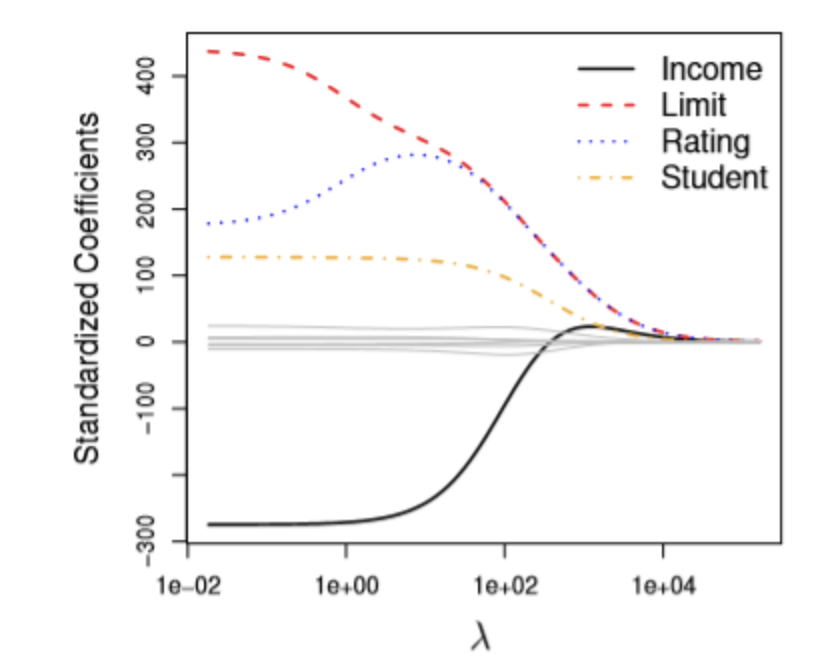

**Parte 2 (OPCIONAL) :**

1. Implemente Lasso para el dataset de esta notebook. Optimice los hiperparÃ¡metros de Lasso. Incluya las grÃ¡ficas que se realizan arriba para Ridge.
2. Implemente ElasticNet para el dataset de esta notebook. Optimice los hiperparÃ¡metros de ElasticNet.  Incluya las grÃ¡ficas que se realizan arriba para Ridge.




> ğŸ–Š `Desarrollar aquÃ­ su actividad`

# âœ… **Actividad: Conclusiones**

Concluya aquÃ­ el trabajo realizado en este laboratorio. Recuerde que las conclusiones deben incluir sus ideas e impresiones de lo estudiado en este laboratorio.


> ğŸ–Š `Desarrollar aquÃ­ su actividad`